# Problem Statement

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing Dataset
df=pd.read_csv(r'C:\Users\315ra\OneDrive\Desktop\internship\microcredit\Data file.csv')


In [4]:
df.head(20)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

Since the feature 'pcircle' has only one unique value for all the rows,it can be removed from the dataset.

In [7]:
df.drop('pcircle',axis=1,inplace=True)

Since the pdate column is in object format,converting it into day,month and year columns after converting it in datetime format.

In [8]:
import datetime
df['pday']=pd.to_datetime(df['pdate']).dt.day

In [9]:
df['pmonth']=pd.to_datetime(df['pdate']).dt.month

In [10]:
df['pyear']=pd.to_datetime(df['pdate']).dt.year

In [11]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pday,pmonth,pyear
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [12]:
df['pyear'].unique()

array([2016], dtype=int64)

Droppping the pdate column as the month,date and the year have been extracted in separate columns.Further dropping the year column as all the data is from the year 2016.

In [13]:
df.drop('pdate',axis=1,inplace=True)
df.drop('pyear',axis=1,inplace=True)

In [14]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [15]:
df['Unnamed: 0'].nunique()

209593

Dropping the 'Unnamed: 0' column as it contains the index number of the rows

In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
#Checking for missing values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pday                    0
pmonth                  0
dtype: int64

No null values in the dataset

In [18]:
df.shape

(209593, 36)

we have 209593 rows and 36 columns now in the dataset

In [19]:
#Checking unique values of each column
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

 Also msisdn is a column with phone numbers of users so this column has no contribution on model building.

In [20]:
df.drop('msisdn',axis=1,inplace=True)

In [21]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


In [22]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

In [23]:
print(df['aon'].min())
print(df['aon'].max())

1.0
999860.755167902


In [24]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3854.219020,6.31543,7.716780,12396.218352,1864.595821,94.436315,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.210975,7.19347,12.590251,16857.793882,2081.680664,368.606406,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.00000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.00000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.00000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


https://www.telkomsel.com/en/about-us/our-story/our-history

the indonesian telecom industry was established on May 26, 1995, so till 2023 it has approximatelt 10220 days so anything above is unrealistic value

In [25]:
unreal=[]
for i in range(0,len(df['aon'])):
    
    if(df['aon'][i]>10220):
        unreal.append(i)

print(len(unreal))

2089


In [26]:
#setting the upper limit as 10220 for the age
for i in range(0,len(df['aon'])):
    
    if(df['aon'][i]>10220):
        df['aon'][i]=10220


In [28]:
df.maxamnt_loans30.nunique()

1050

since we cannot have any avlue avove 12 as per  column description setting upperimit in this case

In [29]:
unreal_1=[]
for i in range(0,len(df['maxamnt_loans30'])):
    
    if(df['maxamnt_loans30'][i]>12):
        unreal_1.append(i)

print(len(unreal_1))

1047


In [30]:
df.drop(unreal_1,inplace=True)
len(df)

208546

In [31]:
#dropping the unwanted columns
df.drop(columns=['fr_da_rech90','fr_da_rech30','fr_ma_rech90','fr_ma_rech30'],inplace=True)

In [32]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'cnt_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pday', 'pmonth'],
      dtype='object')

In [33]:
#Creating list with Numeriacl Columns
col=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

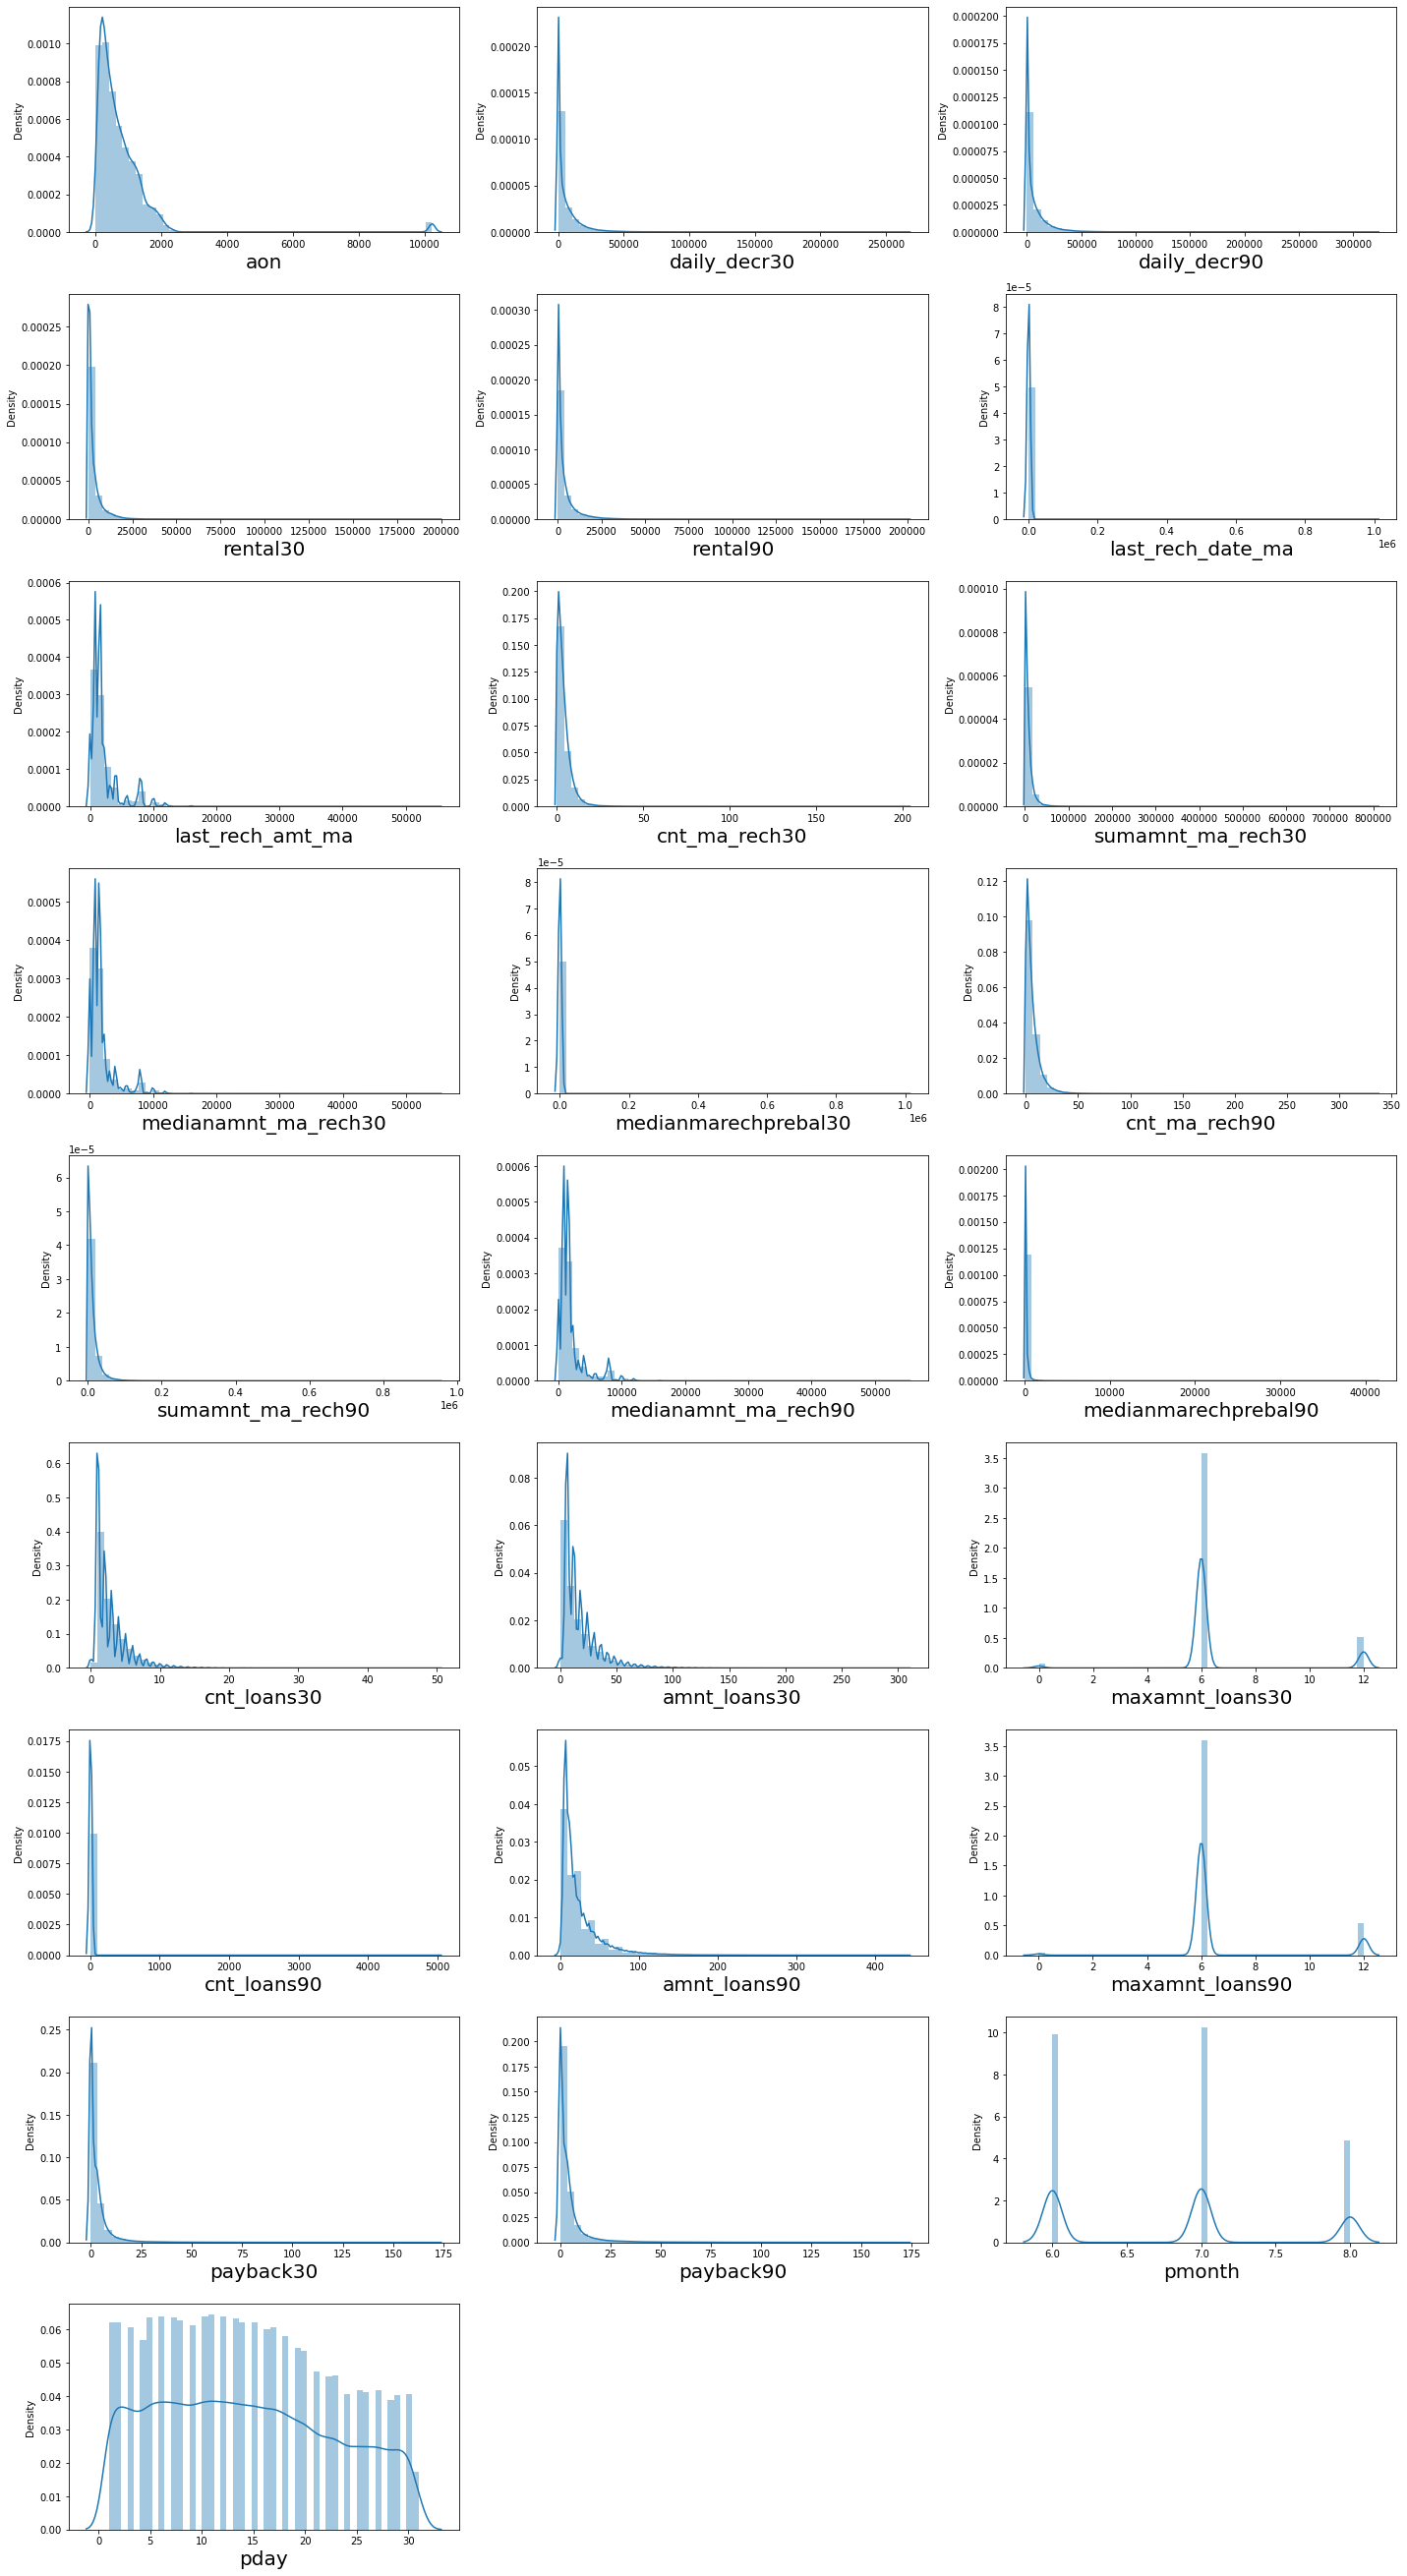

In [34]:
#Distribution plot for all numerical columns except label
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

I can clearly see that there is skewness in most of the columns so we have to treat them.

<AxesSubplot:xlabel='label', ylabel='count'>

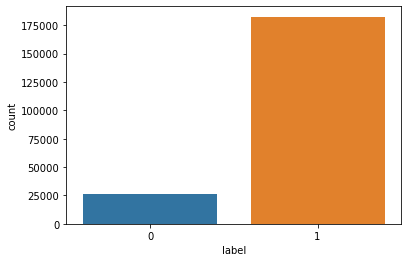

In [36]:
#count plot for target column
sns.countplot(df['label'])

There is a data imbalancing issue so we have to treat this by using oversampling or undersampling.

In [37]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
cnt_da_rech90             int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback90               float64
pday                      int64
pmonth                    int64
dtype: o

# Bivariate Analysis:

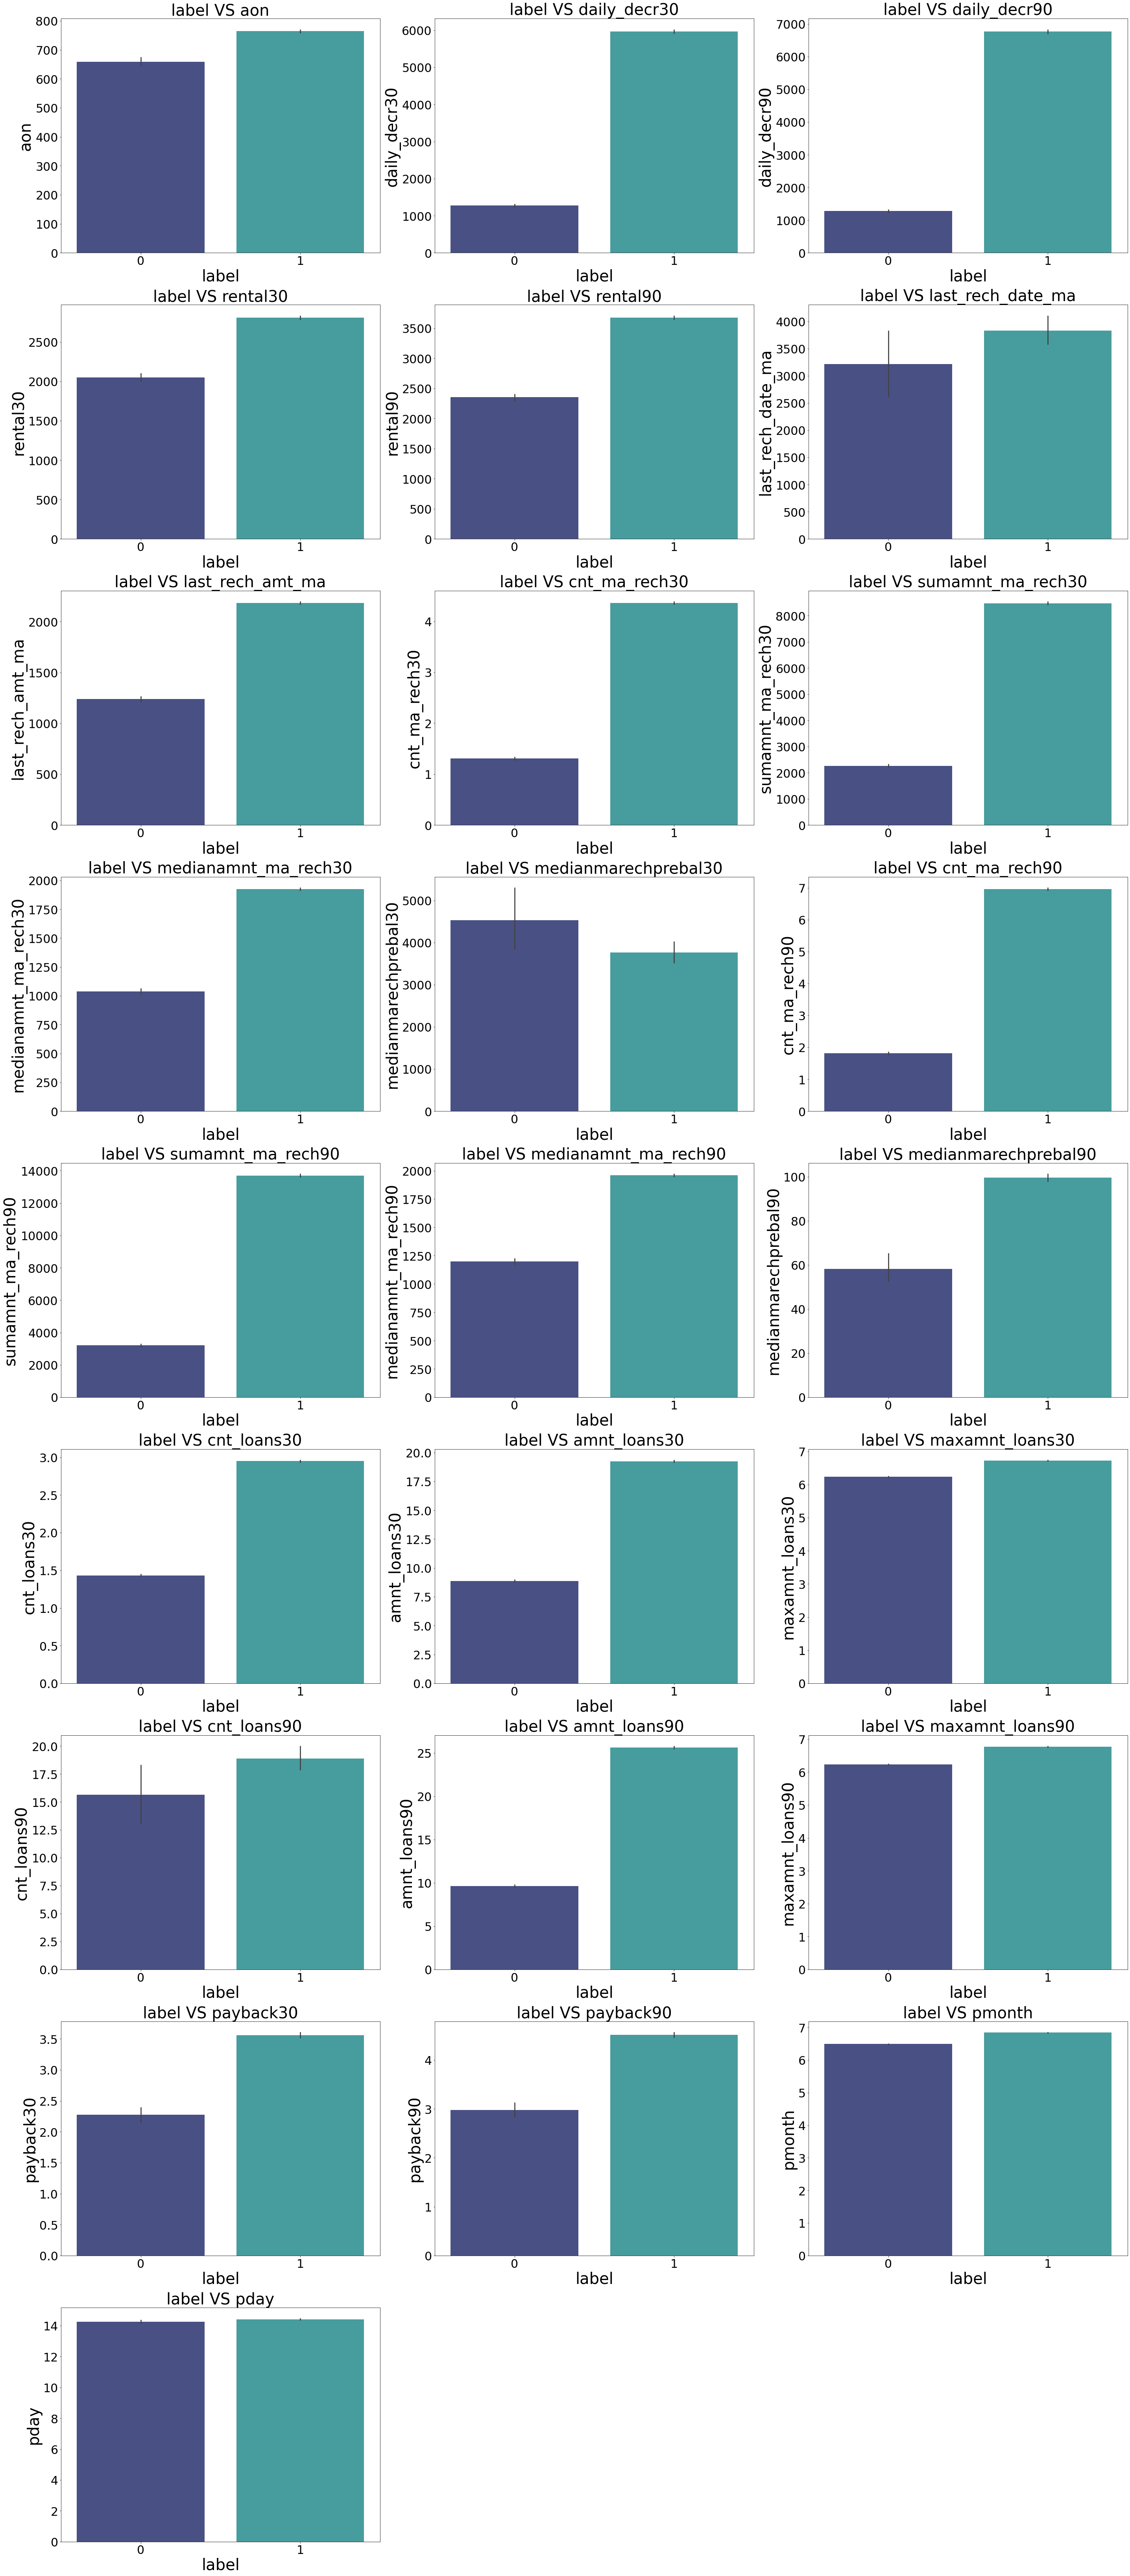

In [38]:
#barplot for numerical columns
plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'], y=df[col[i]], palette="mako")
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

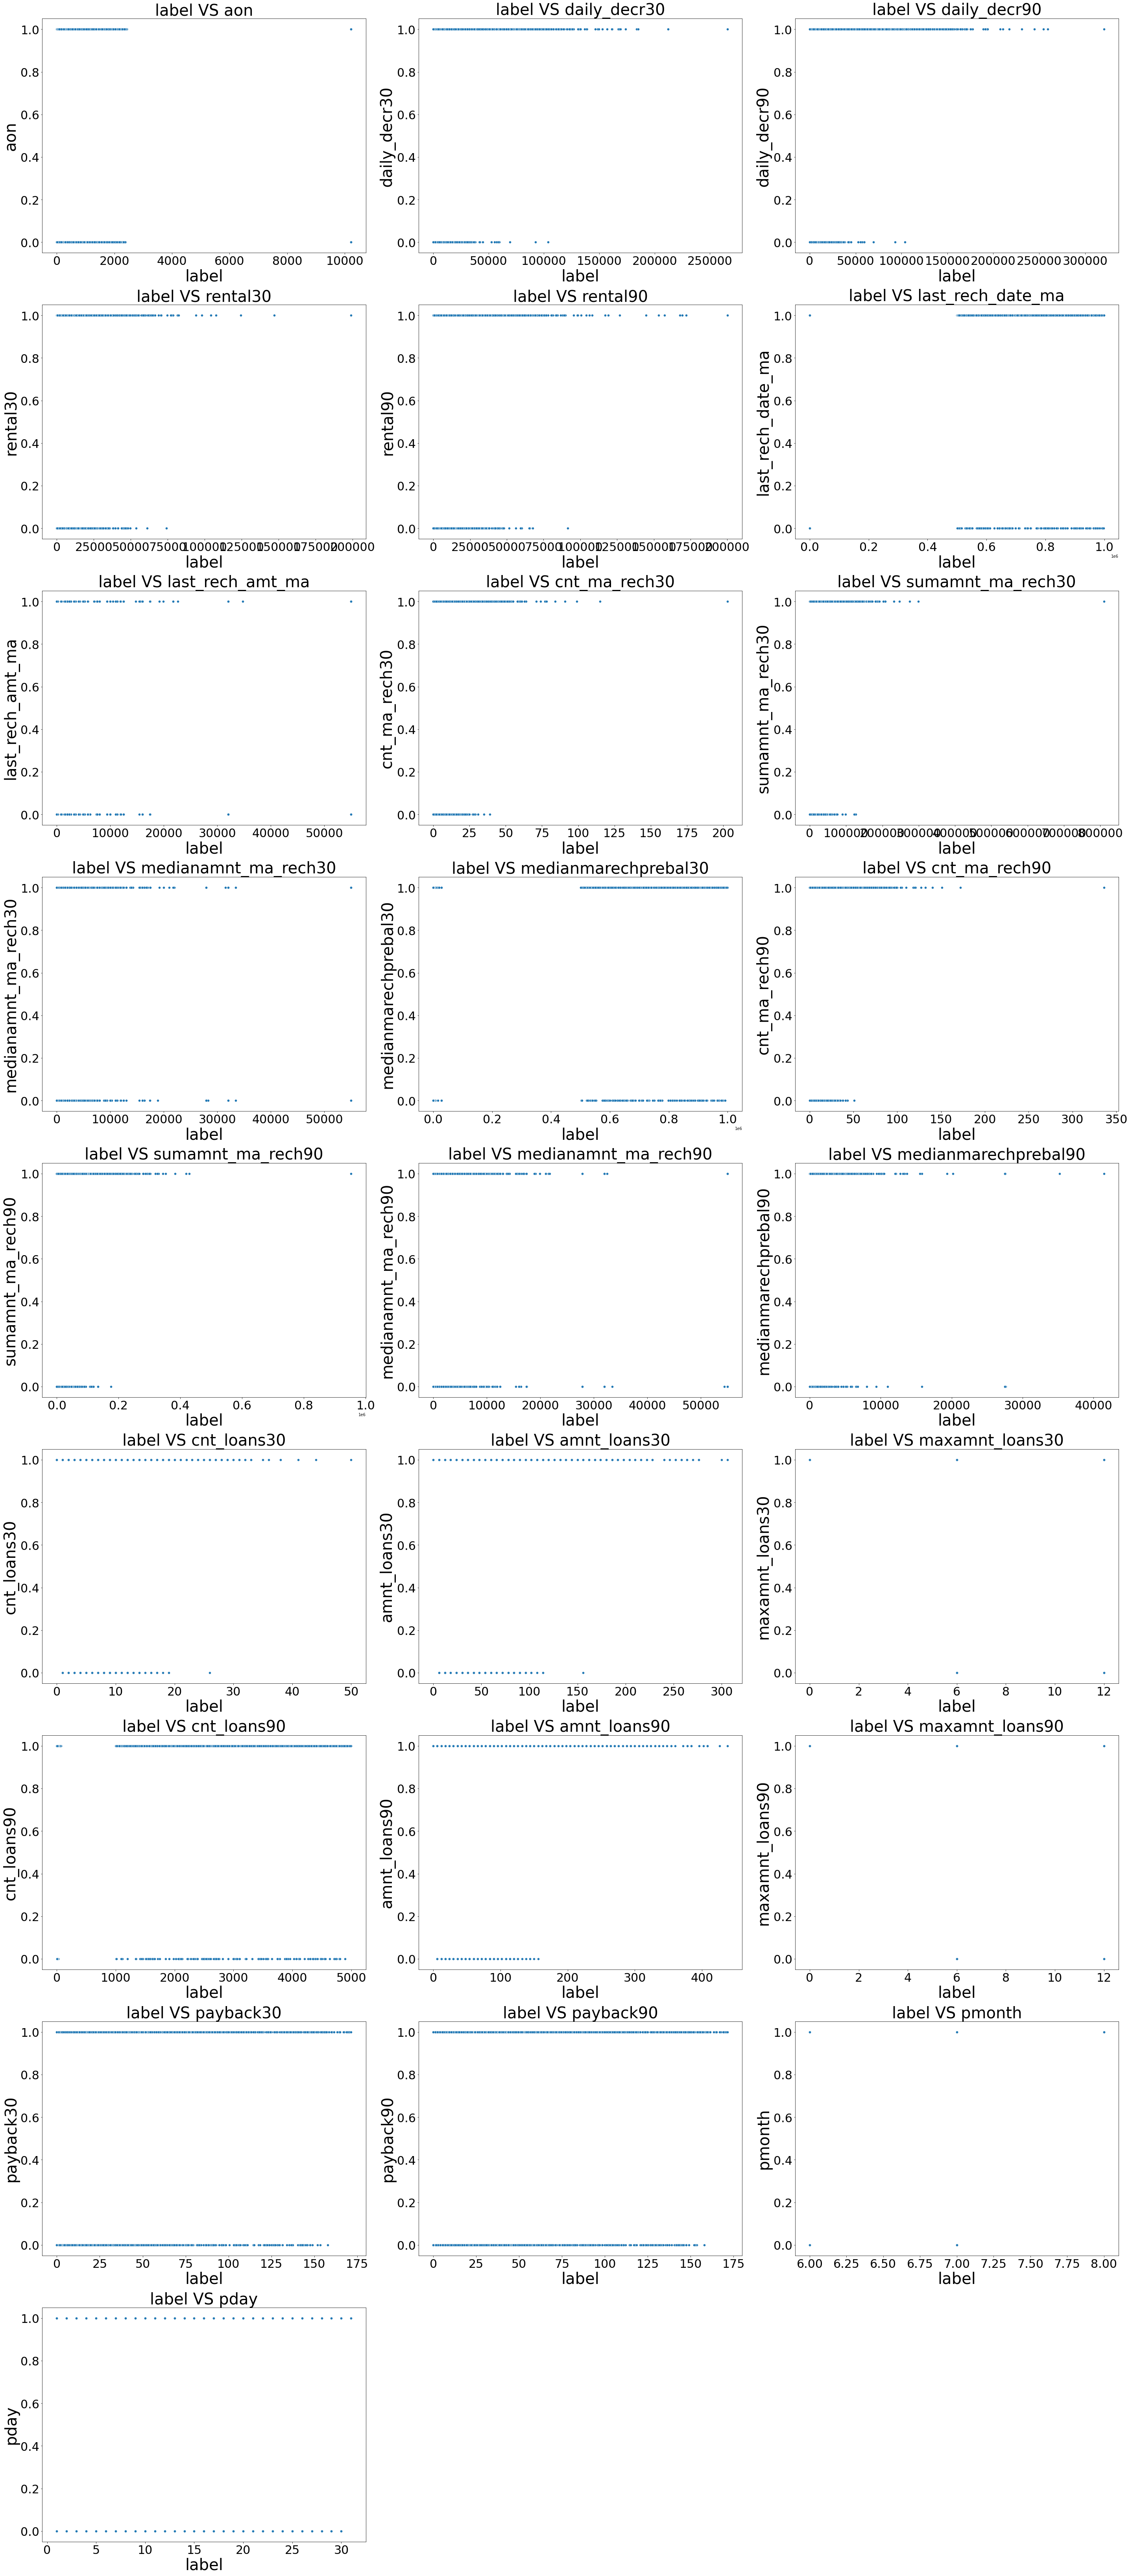

In [39]:
#barplot for numerical columns
plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.scatterplot(y=df['label'], x=df[col[i]], palette="mako")
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

In [ ]:
1.In aon column we can observe unifor data distribution between 0 to 2000 units.
2. In daily_decr30 we can obseve the data beinf uniform till 0 to 50000 and rest are scattered  throughout .Above 100000 we 
    can say that customers are Non defaulters
    
3. In daily_decr90 we can obseve the data beinf uniform till 0 to 50000 and rest are scattered  throughout .Above 100000 we 
    can say that customers are Non defaulters

    
4. In rental30 we can obseve the data beinf uniform till 0 to 50000 and rest are scattered  throughout .

5.In rental90 we can obseve the data beinf uniform till 0 to 50000 and rest are scattered  throughout .

6.In last_rech_date_ma the data is distributed above till 1.0 and slightly scattered throughout.

7.In last_rech_amt_ma the data is uniformly Distributed till 8000 and rest are scattered throughout.

8.In cnt_ma_rech30 the data is uniformly distributed till 30  and rest are scattered throughout.

9.In sumamnt_ma_rech30 the data is uniformly distributed till 100000  and rest are scattered throughout.
    
    
    
    

# Checking for outliers:

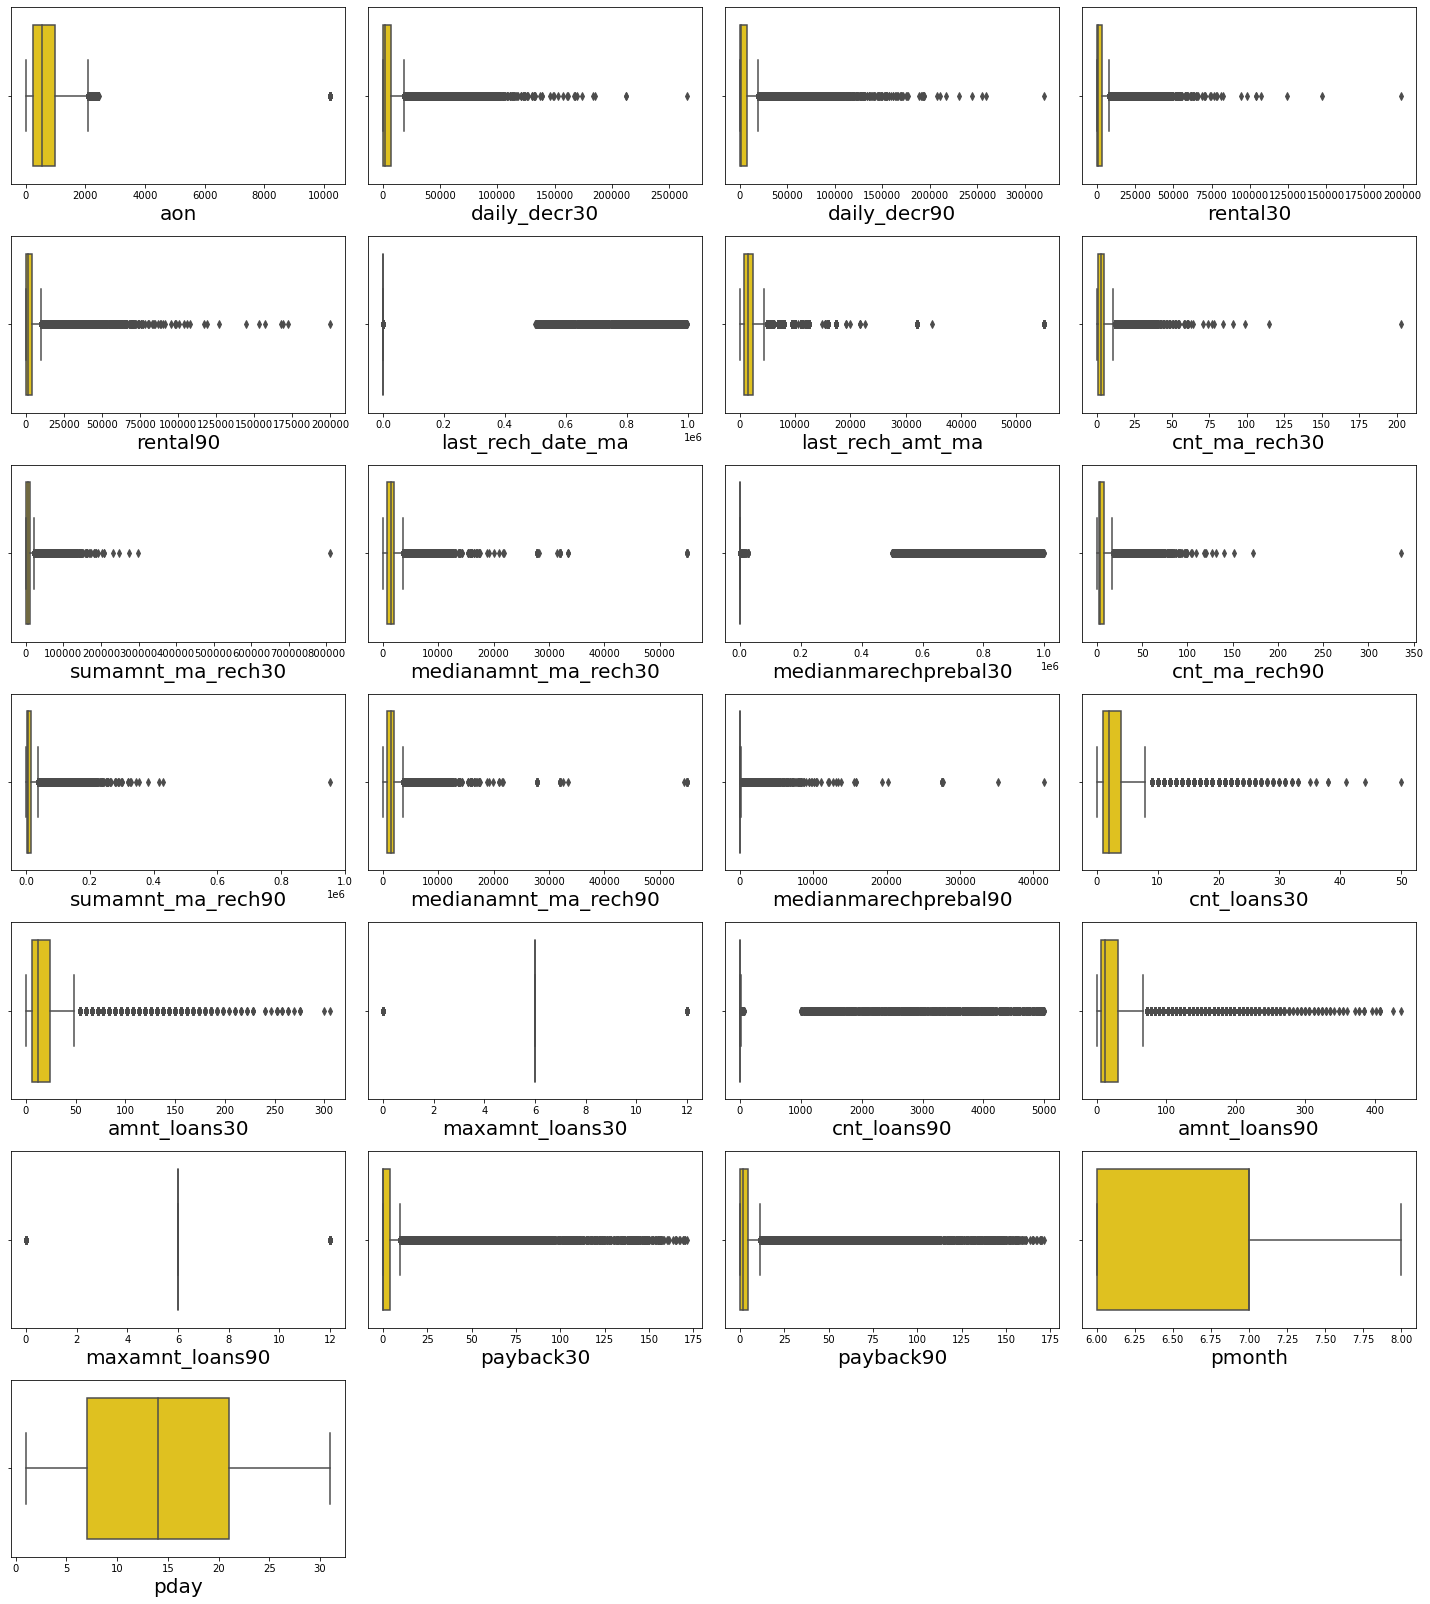

In [40]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Removing Outliers:

# i) Zscore method

In [41]:
#Features having outliers 
features=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma',
             'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 
             'cnt_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 
             'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30',
             'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

Above are the list of columns with outliers in the dataset.

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,3078.0,1539.0,7.50,2,3078,1539.0,7.50,0.0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,5787.0,5787.0,61.04,1,5787,5787.0,61.04,0.0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,1539.0,1539.0,66.32,1,1539,1539.0,66.32,0.0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.00,1,947,947.0,2.50,0.0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,20029.0,2309.0,29.00,8,23496,2888.0,35.00,0.0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [43]:
#Checking dataloss in zscore method
Dataloss = (((df.shape[0]-df_new.shape[0])/df.shape[0])*100)
Dataloss

16.006540523433678

In Z-score method the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [44]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
#Checking dataloss in zscore method
Dataloss = (((df.shape[0]-df_1.shape[0])/df.shape[0])*100)
Dataloss

55.80543381316352

In IQR method the data loss is more than 10% so let me have a look into Standard Deviation method to remove outliers

In [46]:

def determine_outlier_thresholds_std(df, col_name):
    upper_boundary = df[col_name].mean() + 3 * df[col_name].std()
    lower_boundary = df[col_name].mean() - 3 * df[col_name].std()
    return lower_boundary, upper_boundary

In [47]:
for col_name in features.columns:
    
    lower_limit, upper_limit = determine_outlier_thresholds_std(df, col_name)

    df.loc[(df[col_name] < lower_limit), col_name] = lower_limit
    df.loc[(df[col_name] > upper_limit), col_name] = upper_limit

Since the data loss was more than 20%(significantly high),we are not removing the outliers

In [77]:
#seperating the Features and the target variable
X=df.drop('label',axis=1)
y=df.label

# skewness check

In [78]:
X.skew()

aon                      2.105010
daily_decr30             1.977288
daily_decr90             2.083255
rental30                 2.085573
rental90                 2.153487
last_rech_date_ma       14.047770
last_rech_date_da       14.803511
last_rech_amt_ma         1.984755
cnt_ma_rech30            1.474852
sumamnt_ma_rech30        1.836263
medianamnt_ma_rech30     2.118662
medianmarechprebal30    14.017171
cnt_ma_rech90            1.614336
sumamnt_ma_rech90        1.909745
medianamnt_ma_rech90     2.141595
medianmarechprebal90     4.336106
cnt_da_rech30           17.815473
cnt_da_rech90           27.247194
cnt_loans30              1.628999
amnt_loans30             1.691663
maxamnt_loans30          1.483957
medianamnt_loans30       4.556332
cnt_loans90             13.911340
amnt_loans90             1.843722
maxamnt_loans90          1.754625
medianamnt_loans90       4.904026
payback30                3.109521
payback90                2.999434
pday                     0.199937
pmonth        

In [79]:
#Creating a list of skewed features 
fea=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'cnt_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90']

In [81]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [82]:
#Applying Features with powertransformation
X[fea] = scaler.fit_transform(X[fea].values)

In [83]:
#checking the skewness again
X[fea].skew()

aon                    -0.020432
daily_decr30           -0.141410
daily_decr90           -0.131231
rental30               -0.064483
rental90               -0.064988
last_rech_date_ma       0.009415
last_rech_date_da       5.305732
last_rech_amt_ma       -0.108419
cnt_ma_rech30          -0.008747
sumamnt_ma_rech30      -0.362814
medianamnt_ma_rech30   -0.238778
medianmarechprebal30   -0.001338
cnt_ma_rech90          -0.011093
sumamnt_ma_rech90      -0.261495
medianamnt_ma_rech90   -0.098775
medianmarechprebal90   -0.007909
cnt_da_rech30           6.926224
cnt_da_rech90           6.005476
cnt_loans30             0.042218
amnt_loans30            0.006227
maxamnt_loans30         0.360200
medianamnt_loans30      3.450520
cnt_loans90             0.098070
amnt_loans90           -0.002332
maxamnt_loans90         0.229343
medianamnt_loans90      3.783767
payback30               0.291548
payback90               0.203227
dtype: float64

In [ ]:
#We acn observe skewnesss in the below features .lets try to reduce  it.

In [84]:
feat1=['last_rech_date_da','cnt_da_rech30','cnt_da_rech90','medianamnt_loans30','medianamnt_loans90']

In [85]:
X[feat1]=np.cbrt(X[feat1])

In [86]:
X[feat1].skew()

last_rech_date_da     5.305714
cnt_da_rech30         6.926224
cnt_da_rech90         6.005476
medianamnt_loans30    3.450520
medianamnt_loans90    3.783767
dtype: float64

dropping the columns with high skewness As it will hamper the model performance

In [87]:
X.drop(['last_rech_date_da','cnt_da_rech30','cnt_da_rech90','medianamnt_loans30','medianamnt_loans90'],axis=1,inplace=True)

In [88]:
X.skew()

aon                    -0.020432
daily_decr30           -0.141410
daily_decr90           -0.131231
rental30               -0.064483
rental90               -0.064988
last_rech_date_ma       0.009415
last_rech_amt_ma       -0.108419
cnt_ma_rech30          -0.008747
sumamnt_ma_rech30      -0.362814
medianamnt_ma_rech30   -0.238778
medianmarechprebal30   -0.001338
cnt_ma_rech90          -0.011093
sumamnt_ma_rech90      -0.261495
medianamnt_ma_rech90   -0.098775
medianmarechprebal90   -0.007909
cnt_loans30             0.042218
amnt_loans30            0.006227
maxamnt_loans30         0.360200
cnt_loans90             0.098070
amnt_loans90           -0.002332
maxamnt_loans90         0.229343
payback30               0.291548
payback90               0.203227
pday                    0.199937
pmonth                  0.342834
dtype: float64

Skewness in the dataset is removed

# Checking correlation using heat map

In [89]:
cor=X.corr()
cor

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pday,pmonth
aon,1.000000,0.114959,0.115562,0.080371,0.088221,0.063130,0.096794,0.039468,0.081594,0.095850,0.054736,0.060404,0.099150,0.101932,0.058579,0.076068,0.076832,0.031076,0.113519,0.113861,0.038447,0.083148,0.112941,0.015881,0.084985
daily_decr30,0.114959,1.000000,0.998327,0.583846,0.640994,0.136844,0.376403,0.495551,0.554453,0.388992,0.283989,0.627090,0.663875,0.366210,0.247190,0.341591,0.395141,0.297313,0.480206,0.525868,0.316703,0.328554,0.404097,-0.009072,0.816876
daily_decr90,0.115562,0.998327,1.000000,0.584027,0.645965,0.140666,0.375989,0.490941,0.549068,0.385806,0.282396,0.630638,0.666902,0.366502,0.248017,0.334937,0.389132,0.295749,0.480481,0.526418,0.317144,0.325846,0.404724,-0.016149,0.830153
rental30,0.080371,0.583846,0.584027,1.000000,0.973247,0.069140,0.284016,0.454643,0.481493,0.322342,0.236990,0.509967,0.518244,0.272746,0.181554,0.310950,0.341689,0.210890,0.390894,0.416964,0.222769,0.307795,0.342847,0.102086,0.417681
rental90,0.088221,0.640994,0.645965,0.973247,1.000000,0.101418,0.295074,0.445689,0.470174,0.313649,0.232896,0.537478,0.544552,0.283417,0.191357,0.294074,0.329603,0.215758,0.403213,0.431883,0.233617,0.304129,0.359339,0.084817,0.505498
last_rech_date_ma,0.063130,0.136844,0.140666,0.069140,0.101418,1.000000,0.524406,0.012205,0.143441,0.343095,0.218326,0.122531,0.270650,0.514648,0.354402,-0.082496,-0.084576,-0.021249,-0.024601,-0.033029,-0.009759,-0.075990,-0.005854,0.033836,0.079729
last_rech_amt_ma,0.096794,0.376403,0.375989,0.284016,0.295074,0.524406,1.000000,0.321415,0.652441,0.811159,0.432139,0.373410,0.701418,0.902185,0.495961,0.144866,0.164667,0.132703,0.189228,0.201259,0.143047,0.143754,0.180395,0.057699,0.154611
cnt_ma_rech30,0.039468,0.495551,0.490941,0.454643,0.445689,0.012205,0.321415,1.000000,0.857267,0.415733,0.509106,0.920933,0.778274,0.286445,0.389952,0.700420,0.697525,0.186240,0.678922,0.689083,0.185197,0.545782,0.488622,0.097518,0.192264
sumamnt_ma_rech30,0.081594,0.554453,0.549068,0.481493,0.470174,0.143441,0.652441,0.857267,1.000000,0.779103,0.586898,0.804178,0.910460,0.636983,0.470112,0.563675,0.580618,0.235916,0.570379,0.590471,0.239735,0.441284,0.417171,0.101651,0.212052
medianamnt_ma_rech30,0.095850,0.388992,0.385806,0.322342,0.313649,0.343095,0.811159,0.415733,0.779103,1.000000,0.563150,0.400400,0.693775,0.847209,0.456941,0.198123,0.215146,0.151473,0.238645,0.250339,0.160851,0.194033,0.230037,0.074272,0.146182


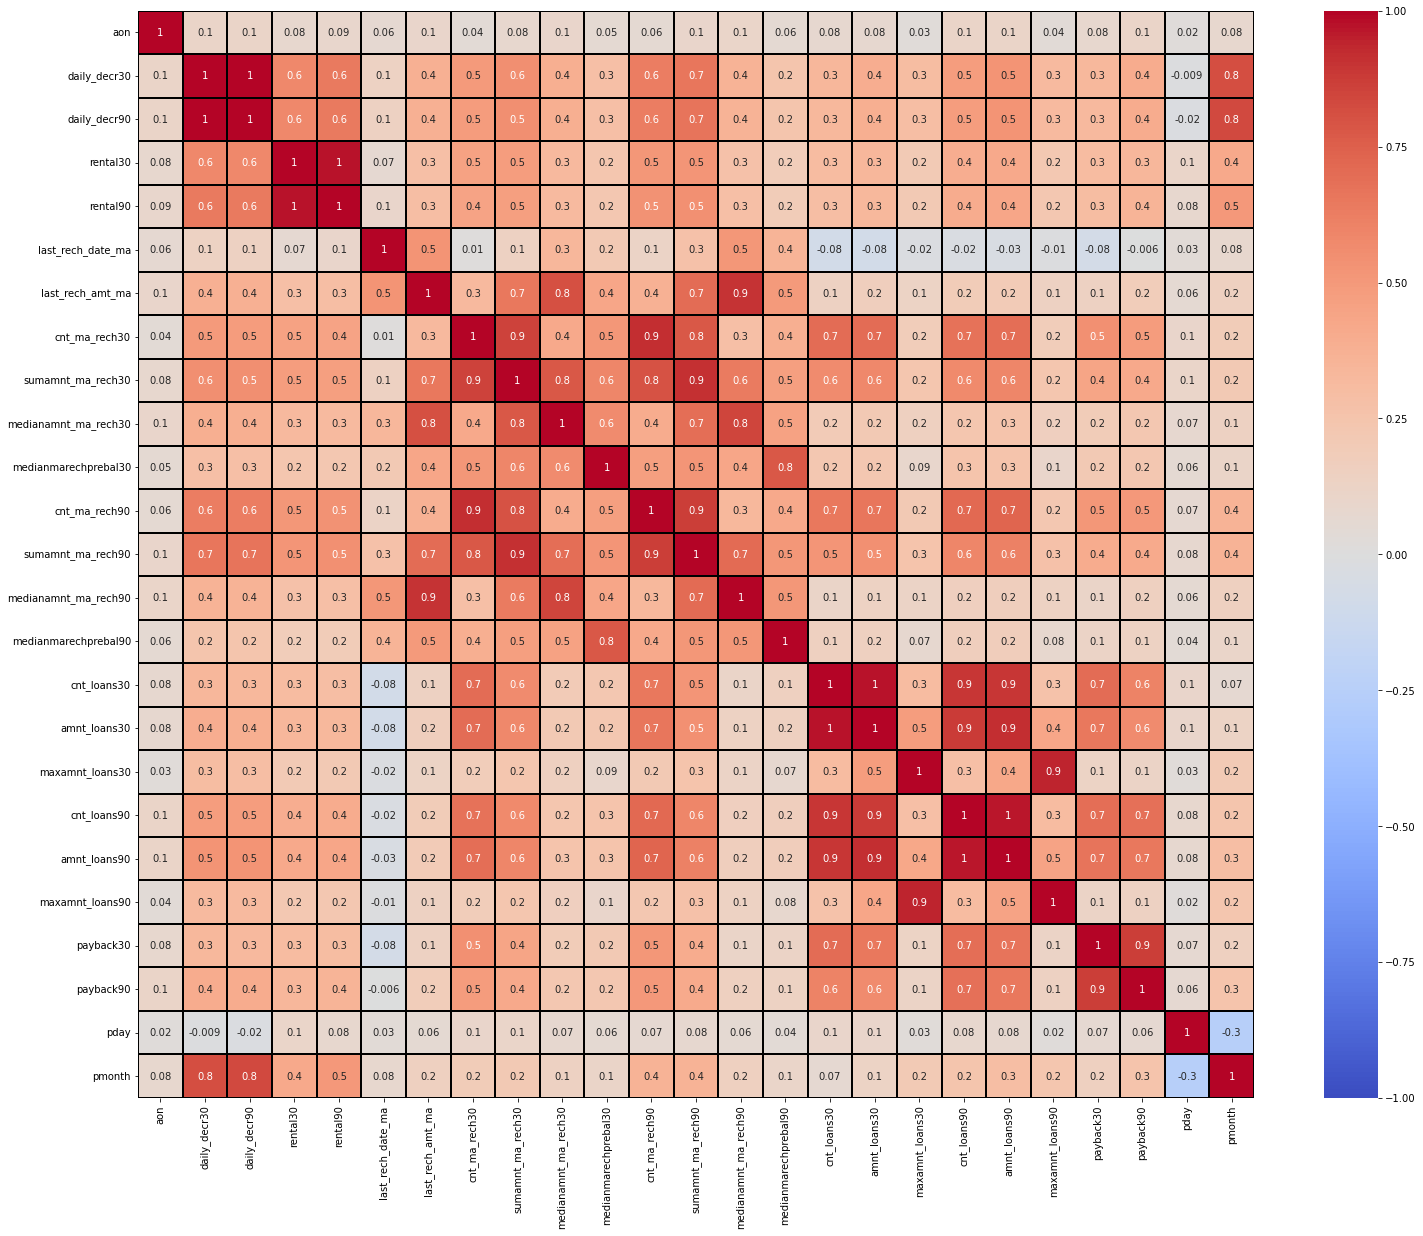

In [90]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(X.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

We can observe high correlation in some of the features,Lets confirm the same through variance_inflation_factor method and 
remove it 

In [91]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_scaled=SC.fit_transform(X)


In [92]:
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pday,pmonth
0,-0.671246,0.493820,0.470836,-0.817881,-0.807609,-0.301206,0.082373,-0.290932,-0.190847,0.210538,-0.624947,-0.591272,-0.458806,0.147112,-0.842090,0.005998,-0.106213,-0.259868,-0.186201,-0.259011,-0.281494,1.830358,1.815027,20,7
1,0.374939,1.119562,1.071553,0.789841,0.624924,1.426529,1.550285,-0.811664,0.220665,1.693150,0.415527,-1.035568,-0.095694,1.749484,0.358732,-0.916964,-0.106213,2.306728,-1.034906,-0.259011,2.307203,-0.938088,-1.019310,10,8
2,0.044164,0.177302,0.162502,-0.127639,-0.226022,0.025621,0.082373,-0.811664,-0.556983,0.210538,0.458208,-1.035568,-0.784305,0.147112,0.415328,-0.916964,-0.906135,-0.259868,-1.034906,-1.012455,-0.281494,-0.938088,-1.019310,19,8
3,-0.789839,-1.127555,-1.125283,-0.950231,-1.001609,1.826713,-0.300664,-1.678038,-1.899408,-1.961995,-1.749064,-1.035568,-0.974429,-0.264167,-1.282223,0.005998,-0.106213,-0.259868,-0.186201,-0.259011,-0.281494,-0.938088,-1.019310,6,6
4,0.723221,-0.592790,-0.592648,-0.013089,-0.119060,0.259451,0.458999,1.012753,1.315761,0.589631,0.035599,0.663389,1.011510,0.808054,-0.002824,1.602960,1.504237,-0.259868,1.181727,1.120358,-0.281494,0.639927,0.428498,22,6


In [93]:
X=pd.DataFrame(X_scaled,columns=X.columns)

In [94]:
#importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns

In [95]:
vif.sort_values('vif')

,vif,features
0,1.038045,aon
23,1.285261,pday
5,1.884370,last_rech_date_ma
14,3.371813,medianmarechprebal90
10,3.772398,medianmarechprebal30
22,5.228908,payback90
21,5.555804,payback30
6,6.510753,last_rech_amt_ma
24,6.788091,pmonth
20,14.053272,maxamnt_loans90


vif values >10 so multicollinearity is visible so 

lets drop the columns iteratively with the highest vif values

In [96]:
X.drop('daily_decr90',axis=1,inplace=True)

In [97]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.038034,aon
22,1.280039,pday
4,1.883591,last_rech_date_ma
13,3.368273,medianmarechprebal90
9,3.771236,medianmarechprebal30
21,5.228855,payback90
20,5.555109,payback30
23,5.772085,pmonth
5,6.508075,last_rech_amt_ma
1,7.125036,daily_decr30


lets drop the columns iteratively with the highest vif values so that multicollinearity can be removed

In [98]:
X.drop('amnt_loans30',axis=1,inplace=True)

In [99]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.038030,aon
21,1.277855,pday
4,1.879028,last_rech_date_ma
13,3.368203,medianmarechprebal90
9,3.763909,medianmarechprebal30
20,5.187711,payback90
19,5.545570,payback30
22,5.739899,pmonth
5,6.507944,last_rech_amt_ma
1,7.118281,daily_decr30


lets drop the columns iteratively with the highest vif values so that multicollinearity can be removed

In [100]:
X.drop('sumamnt_ma_rech30',axis=1,inplace=True)

In [101]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.038014,aon
20,1.276868,pday
4,1.857368,last_rech_date_ma
12,3.368137,medianmarechprebal90
8,3.757750,medianmarechprebal30
19,5.181696,payback90
18,5.544098,payback30
21,5.699872,pmonth
7,5.736522,medianamnt_ma_rech30
5,6.342166,last_rech_amt_ma


lets drop the columns iteratively with the highest vif values so that multicollinearity can be removed

In [102]:
X.drop('amnt_loans90',axis=1,inplace=True)

In [103]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.035735,aon
19,1.272137,pday
4,1.853174,last_rech_date_ma
12,3.361874,medianmarechprebal90
8,3.757361,medianmarechprebal30
18,5.141595,payback90
17,5.516096,payback30
20,5.621549,pmonth
7,5.725160,medianamnt_ma_rech30
5,6.340503,last_rech_amt_ma


lets drop the columns iteratively with the highest vif values so that multicollinearity can be removed

In [104]:
X.drop('rental90',axis=1,inplace=True)

In [105]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.035693,aon
18,1.261097,pday
2,1.658373,rental30
3,1.848739,last_rech_date_ma
11,3.360185,medianmarechprebal90
7,3.757168,medianmarechprebal30
17,5.122883,payback90
19,5.299980,pmonth
16,5.510873,payback30
6,5.694814,medianamnt_ma_rech30


lets drop the columns iteratively with the highest vif values so that multicollinearity can be removed

In [106]:
X.drop('cnt_ma_rech90',axis=1,inplace=True)

In [107]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.033721,aon
17,1.258813,pday
3,1.613340,last_rech_date_ma
2,1.658372,rental30
10,3.319577,medianmarechprebal90
7,3.752865,medianmarechprebal30
16,5.100122,payback90
18,5.137402,pmonth
15,5.509085,payback30
6,5.545382,medianamnt_ma_rech30


lets drop the columns iteratively with the highest vif values so that multicollinearity can be removed

In [108]:
X.drop('sumamnt_ma_rech90',axis=1,inplace=True)

In [109]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.033718,aon
16,1.258401,pday
3,1.592850,last_rech_date_ma
2,1.652765,rental30
9,3.279417,medianmarechprebal90
5,3.337906,cnt_ma_rech30
7,3.706170,medianmarechprebal30
15,5.089890,payback90
17,5.135980,pmonth
14,5.486306,payback30


lets drop the columns iteratively with the highest vif values so that multicollinearity can be removed

In [110]:
X.drop('maxamnt_loans30',axis=1,inplace=True)

In [111]:
SC=StandardScaler()
X_scaled=SC.fit_transform(X)

X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
0,1.033708,aon
12,1.203685,maxamnt_loans90
15,1.257579,pday
3,1.592790,last_rech_date_ma
2,1.651874,rental30
9,3.279398,medianmarechprebal90
5,3.298238,cnt_ma_rech30
7,3.705340,medianmarechprebal30
14,5.086236,payback90
16,5.129141,pmonth


The multicolllinearity is removed from the columns.lets continue

# Checking the Imbalance in the Target

In [112]:
#Checking the value count of target column
y.value_counts()

1    182513
0     26033
Name: label, dtype: int64

In [113]:
#importing SMOTE for oversampling to removed imbalance in the dataset

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

<AxesSubplot:xlabel='label', ylabel='count'>

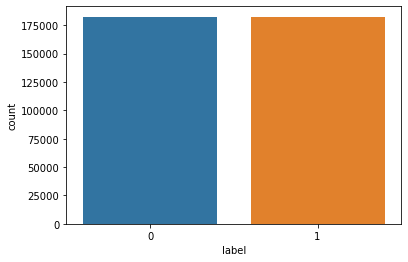

In [114]:
# Visualizing the target data after oversampling
sns.countplot(y)

In [ ]:
#Now the dataset is balanced

# PROCEEDING TO MODEL TESTING AND TRAINING

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [117]:
#finding best random_state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.7622456806808635  on random_state  1


In [118]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [119]:
x_train.shape

(255518, 17)

In [120]:
x_test.shape

(109508, 17)

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score

In [122]:
# different algorithm going to use
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
ada=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()
etc=ExtraTreesClassifier()

In [123]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print("accuracy score is :",accuracy_score(y_test,pred)*100)
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))
    
    #cross validation score
    scores = cross_val_score(mod, X, y, cv = 5).mean()*100
    print("\nCross validation score :", scores)

    #difference of accuracy and cv score
    acc_score=accuracy_score(y_test,pred)*100
    diff = acc_score - scores
    print("difference of accuracy and cross_val_score is :", abs(diff))

# Logistic Regression

In [124]:
eval(lg)

LogisticRegression()
accuracy score is : 76.22456806808636


Confusion Matrix : 
 [[42149 12612]
 [13424 41323]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76     54761
           1       0.77      0.75      0.76     54747

    accuracy                           0.76    109508
   macro avg       0.76      0.76      0.76    109508
weighted avg       0.76      0.76      0.76    109508


Cross validation score : 75.93103021670203
difference of accuracy and cross_val_score is : 0.293537851384329


# DECISION TREE CLASSIFIER

In [125]:
eval(dtc)

DecisionTreeClassifier()
accuracy score is : 91.20886145304453


Confusion Matrix : 
 [[50378  4383]
 [ 5244 49503]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     54761
           1       0.92      0.90      0.91     54747

    accuracy                           0.91    109508
   macro avg       0.91      0.91      0.91    109508
weighted avg       0.91      0.91      0.91    109508


Cross validation score : 91.12010548352292
difference of accuracy and cross_val_score is : 0.08875596952161402


# RANDOM FOREST CLASSIFIER

In [126]:
eval(rf)

RandomForestClassifier()
accuracy score is : 95.19030573108815


Confusion Matrix : 
 [[52440  2321]
 [ 2946 51801]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     54761
           1       0.96      0.95      0.95     54747

    accuracy                           0.95    109508
   macro avg       0.95      0.95      0.95    109508
weighted avg       0.95      0.95      0.95    109508


Cross validation score : 95.12776269707663
difference of accuracy and cross_val_score is : 0.06254303401151162


# KNeighborsClassifier

In [127]:
eval(knn)

KNeighborsClassifier()
accuracy score is : 89.90758666033531


Confusion Matrix : 
 [[54228   533]
 [10519 44228]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     54761
           1       0.99      0.81      0.89     54747

    accuracy                           0.90    109508
   macro avg       0.91      0.90      0.90    109508
weighted avg       0.91      0.90      0.90    109508


Cross validation score : 90.37931622399938
difference of accuracy and cross_val_score is : 0.47172956366406993


# Adaboost Classifier

In [128]:
eval(ada)

AdaBoostClassifier()
accuracy score is : 84.52989735909705


Confusion Matrix : 
 [[47096  7665]
 [ 9276 45471]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     54761
           1       0.86      0.83      0.84     54747

    accuracy                           0.85    109508
   macro avg       0.85      0.85      0.85    109508
weighted avg       0.85      0.85      0.85    109508


Cross validation score : 84.39728411126669
difference of accuracy and cross_val_score is : 0.13261324783036343


# GradientBoostingClassifier

In [129]:

eval(gd)

GradientBoostingClassifier()
accuracy score is : 89.65646345472477


Confusion Matrix : 
 [[49986  4775]
 [ 6552 48195]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     54761
           1       0.91      0.88      0.89     54747

    accuracy                           0.90    109508
   macro avg       0.90      0.90      0.90    109508
weighted avg       0.90      0.90      0.90    109508


Cross validation score : 89.39939885921075
difference of accuracy and cross_val_score is : 0.2570645955140236


# XGBClassifier

In [130]:

eval(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
accuracy score is : 95.01588925010044


Confusion Matrix : 
 [[51504  3257]
 [ 2201 52546]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     54761
           1       0.94      

# ExtraTreesClassifier

In [131]:
eval(etc)

ExtraTreesClassifier()
accuracy score is : 95.93363041969536


Confusion Matrix : 
 [[53496  1265]
 [ 3188 51559]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     54761
           1       0.98      0.94      0.96     54747

    accuracy                           0.96    109508
   macro avg       0.96      0.96      0.96    109508
weighted avg       0.96      0.96      0.96    109508


Cross validation score : 96.39286269834253
difference of accuracy and cross_val_score is : 0.4592322786471641


# SVC

In [ ]:

eval(svc)

SVC()
accuracy score is : 86.38090367827009


Confusion Matrix : 
 [[48558  6203]
 [ 8711 46036]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     54761
           1       0.88      0.84      0.86     54747

    accuracy                           0.86    109508
   macro avg       0.86      0.86      0.86    109508
weighted avg       0.86      0.86      0.86    109508



# Based on the above performance we can confirm  the best model as RandomForest classifier with least difference between Accuracy and Crossvalidation score of 0.062.

# ROC-AUC curve:

In [ ]:
#code for AUC_ROC CURVE

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

def auc_roc(mod):
    plot_roc_curve(mod,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [ ]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
ada=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()
etc=ExtraTreesClassifier()

In [ ]:
# Plotting ROC for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lg, X_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, X_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ada, X_test, y_test, ax=disp.ax_)
plot_roc_curve(gd, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb, X_test, y_test, ax=disp.ax_)
plot_roc_curve(gd, X_test, y_test, ax=disp.ax_)
plot_roc_curve(etc, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# HyperParameterTuning RandomForestClassifer using GridSearchCV

In [141]:
#importing gridsearch 
from sklearn.model_selection import GridSearchCV


#parameters of RandomForestClassifier 
parameters = { 
    'n_estimators':[100,200,300,400],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : range(2,10,2),
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf' :[2,4]
}

In [ ]:

grid=GridSearchCV(estimator=rf,param_grid=parameters,cv=5)
print(grid)
#training the model 
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 10, 2),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'n_estimators': [100, 200, 300, 400]})


In [136]:
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)


AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
#Tuning the model with the best parameters
best_model=RandomForestClassifier(criterion='',n_estimators=,max_features=,max_depth=,min_samples_leaf=)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("score: ",best_model.score(x_train,y_train))
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Saving the model using pickle.dump method from the pickle library

In [ ]:
import pickle
filename2='micro_credit_defaulter_prediction.sav'
pickle.dump(best_model,open(filename2,'wb'))

Re-Loading the model for testing

In [ ]:
load_model=pickle.load(open(filename2,'rb'))

In [ ]:
predictions=load_model.predict_proba(x_test[20000:20100])
predictions

Now displaying the probablity of default in loans and the probablity of success simultaneously for the test data

In [ ]:
for i in predictions[:,0]:
    fail=i*100
    print("The probality of the person defaulting in repayment is: ",np.round(fail,2),'%')

In [ ]:
for i in predictions[:,1]:
    success=i*100
    print("The probablity of successful repayment are: ",np.round(success,2),'%')